<a href="https://colab.research.google.com/github/elybatista/Data_Science/blob/master/Analisando_a_Violencia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

A violência é um problema constante no Brasil e atinge direta ou indiretamente a população em todas as cidades. Os níveis estão acima da média mundial. Os homicídios chegaram em 2016 a uma taxa de 30,3 mortes para cada 100 mil habitantes, uma das mais altas do mundo. O limite considerado como suportado pela Organização Mundial da Saúde (OMS) é de 10 homicídios por 100 mil habitantes.

As leis de acesso a informação vêm proporcionando a disponibilização de várias fontes de dados pelos seus órgãos públicos. Como, por exemplo, o Instituto de Segurança Pública do Estado do Rio de Janeiro (www.ispdados.rj.gov.br) que disponibiliza bases de dados de registros criminais e de atividade policial no estado.

<center>
<img width='50%' src='https://super.abril.com.br/wp-content/uploads/2017/12/rio-de-janeiro.png?quality=70&strip=info&resize=680,453'>
</center>

## Obtenção dos Dados

Os dados para essa análise foram obtidos no ISPDados (www.ispdados.rj.gov.br), que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro. Os dados vão de 1991 a 2019.

### Importando os dados

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
%matplotlib inline

# Importando os dados do csv para um dataset do pandas
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados

Vamos antecipar algumas informações sobre o nosso dataset para ver o seu tamanho, tipos de dados, nomes das colunas, quantidade das colunas e linhas, ver um exemplo desses dados e verificar a quantidade de dados ausentes em cada coluna.


### Tamanho do nosso dataset.

In [2]:
print('Variáveis: {}'.format(df.shape[1]))
print('Entradas: {}'.format(df.shape[0]))

Variáveis: 56
Entradas: 344


### Colunas existentes

In [3]:
# listando o nome das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

### Tipos das variáveis

In [4]:
# Mostra os tipos de cada variável
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Podemos ver que todas as variáveis são do tipo numéricas (int ou float).


### Visualização das primeiras linhas do nosso dataset

In [5]:
# Mostra as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Quantidade de valores ausentes

In [6]:
# Mostra a quantidade de valores ausentes.
df.isnull().sum()

vano                            0
mes                             0
hom_doloso                      0
lesao_corp_morte               96
latrocinio                      0
hom_por_interv_policial        84
tentat_hom                      0
lesao_corp_dolosa               0
estupro                       144
hom_culposo                    84
lesao_corp_culposa             96
roubo_comercio                  0
roubo_residencia                0
roubo_veiculo                   0
roubo_carga                     0
roubo_transeunte                0
roubo_em_coletivo               0
roubo_banco                     0
roubo_cx_eletronico           144
roubo_celular                 108
roubo_conducao_saque          144
roubo_apos_saque              144
roubo_bicicleta               276
outros_roubos                   0
total_roubos                    0
furto_veiculos                  0
furto_transeunte                0
furto_coletivo                144
furto_celular                 144
furto_biciclet

Vamos ver a porcentagem desses valores ausentes.

In [7]:
# Mostra a porcentagem de valores ausentes
df.isnull().sum() / df.shape[0]

vano                          0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.279070
latrocinio                    0.000000
hom_por_interv_policial       0.244186
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.418605
hom_culposo                   0.244186
lesao_corp_culposa            0.279070
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_transeunte              0.000000
roubo_em_coletivo             0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.418605
roubo_celular                 0.313953
roubo_conducao_saque          0.418605
roubo_apos_saque              0.418605
roubo_bicicleta               0.802326
outros_roubos                 0.000000
total_roubos                  0.000000
furto_veiculos           

Podemos ver que há muitas variáveis com valores ausentes. Algumas até com valores consideráveis, como ***furto_bicicleta*** (80%) e **trafico_drogas** (52%).

Outras variáveis, como **roubo_cx_eletronico** (41%) e **roubo_celular** (31%), tem explicação para essa ausência de valores, como veremos mais a frente.

### Informações Estatísticas do dataset

Agora vamos ver algumas informações estatísticas do nosso dataset, como percentil, média, mediana, desvio padrão, valor máximo, valor mínimo, etc. Isso nos ajuda a identificar melhor os dados. Podendo ver se há outliers, a distribuição dos dados e identificar algumas falhas nas distribuições dos dados.

In [8]:
# Mostra os dados estatísticos das variáveis
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Esse resumo nos ajuda a ver muitos valores estatísticos de uma só vêz. Podemos ver, por exemplo, que a variável hom_doloso (homicídio doloso) tem o valor máximo de 831 e o valor mínimo de 272, com uma média de 504.

## Informações Estatísticas da Violência no Rio de Janeiro

### Crimes Contra o Patrimônio (Veículos)

<img width="40%" src='https://exame.com/wp-content/uploads/2016/10/size_960_16_9_ladrao-carro.jpg?quality=70&strip=info&w=920'>

O furto e roubos de veículos sempre tiveram números muito expressivos no país por ser altamente rentáveis para os criminosos. Com informações no dataset sobre roubo, furtos e recuperação de veículos, podemos tirar informações importantes sobre esse tipo de crime na cidade do Rio de Janeiro.

#### Média de Roubo de Veículos

In [9]:
# Média de roubo_veiculo
mRouVei = df.roubo_veiculo.mean()
print('Média de Roubo de Veículos: {:.2f}'.format(mRouVei))

Média de Roubo de Veículos: 2448.70


#### Média de Furtos de Veículos

In [10]:
# Média de furto_veiculos
mFurVei = df.furto_veiculos.mean()
print('Média de Furto de Veículos: {:.2f}'.format(mFurVei))

Média de Furto de Veículos: 1674.67


Podemos ver que a média de furtos é um pouco menor em relação a roubos. Mas mesmo assim os números são altos.

#### Média de Recuperação de Veículos

In [11]:
# Média de recuperacao_veiculos
mRecVei = df.recuperacao_veiculos.mean()
print('Média de Recuperação de Veículos: {:.2f}'.format(mRecVei))

Média de Recuperação de Veículos: 1772.24


#### Média de Veículos perdidos por Mês

In [12]:
# Média de veíclos perdidos por mês
print('Média de veículos perdidos por mês: {:.2f}'.format(mRouVei + mFurVei))
print('Média de veículos recuperados por mês: {:.2f}'.format(mRecVei))

totalRouFur = mRouVei + mFurVei
percRecuperados = mRecVei / totalRouFur * 100
print('\n{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(percRecuperados))

Média de veículos perdidos por mês: 4123.37
Média de veículos recuperados por mês: 1772.24

42.98% dos veículos roubados ou furtados são recuperados.


### Crimes Contra a Vida

<img width='40%' src='https://viniciusteixeiracomunicador.com/wp-content/uploads/2020/04/morto.jpg'>

Vamos agora ver qual foi o máximo e mínimo mensal registrado para homicídio doloso (hom_doloso) no dataset.

In [13]:
# Vamos obter os valores máximo e mínimo da variável hom_doloso
max = df.hom_doloso.max()
min = df.hom_doloso.min()

print('Homicídio Doloso')
print('-'*16)
print('Mín.: \t{}'.format(min))
print('Máx.: \t{}'.format(max))


Homicídio Doloso
----------------
Mín.: 	272
Máx.: 	831


Podemos ver acima que entre os anos de 1991 e 2019, o registro mensal que foi registrado a mínima quantidade de homicídios dolosos é 272 casos. Já o registro com a máxima quantidade mensal tem 831 casos registrados.

Vamos investigar um pouco mais a fundo esses dois registros.

In [14]:
# Buscando o mês com menor número
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [15]:
# Buscando o mês com maior número
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Vemos acima que em Janeiro de 1995 foi o mês que mais houve casos registrados de homicídios dolosos, já em 
Junho de 2015 foi o mês com o menor número de registros.

Isso pode indicar que, talvez, esse tipo de crime venha diminuindo com o passar dos anos. Uma análise mais profunda é o que pode responder a essa questão.

## Visualização de Dados


### Homicídio Doloso

Vamos montar um gráfico da variável hom_doloso para ver como está a distribuição desta variável. Iremos usar o gráfico de histograma que são úteis para esse tipo de visualização.

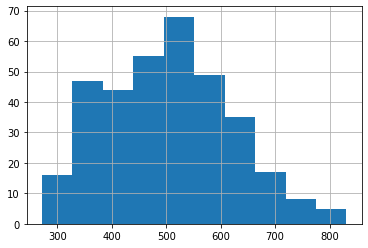

In [16]:
df.hom_doloso.hist();


Podemos ver no gráfico acima que, entre os anos de 1991 e 2019, houveram quase 70 meses com os homicídios variando na faixa entre 500 e 550. E houveram menos de 8 meses, nesse mesmo período analisado, uma faixa de 800 registros de homicídios mensais.

Vamos plotar um gráfico de linha para ver quais meses tem o maior e menor índice de homicídios.

Vamos pegar, por exemplo, todos os meses de janeiro de todos esses 28 anos e tirar uma média e vamos fazer isso com todos os outros meses.

Dessa forma podemos ver nesses 28 anos de registros armazenados neste dataset (de 1991 a 2019), qual o mês que há mais casos de homicídio doloso e o mês que há menos casos.

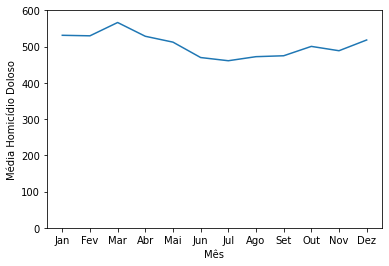

In [18]:
# Vamos agrupar os dados pela variável mes e pega a média de cada mês desses 28 anos
# Importando biblioteca
import matplotlib.pyplot as plt

homDolosoMediaMensal = df.groupby(['mes']).hom_doloso.mean()

meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
plt.plot(meses, homDolosoMediaMensal)
plt.ylim(0,600)
plt.xlabel('Mês')
plt.ylabel('Média Homicídio Doloso')
plt.show()

Vemos no gráfico acima a média mensal nesses 28 anos. Março é o mês com maior média de homicídio doloso, acima de 560, e Julho é o mês com a menor média, um pouco acima de 460. A diferença entre a maior e a menor média varia em torno de 100.  

É interessante esse padrão! Vemos um aumento, todos os anos, no mês de Março e uma diminuição em Julho. Isso acontecendo durante esses 28 anos. Vendo isso, ficamos com algumas questões:

* Qual será o motívo de sempre haver aumento de crimes do tipo homicídio doloso no mês de Março de todos esses anos?

* E qual será o motivo da diminuição desse mesmo tipo de crime no mês de Julho?

### Roubo em Coletivo

<img width='40%' src='https://piauihoje.com/migration/public_html/media/image_bank/2017/5/transporte-coletivo.jpg'>

Agora vamos ver um gráfico de roubo em coletivo nesses 28 anos.

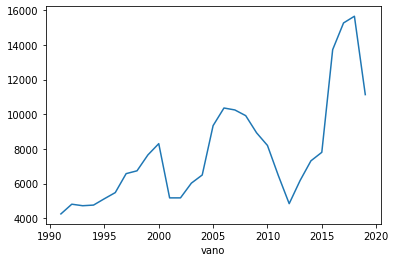

In [19]:
# Plota gráfico para a variável roubo_em_coletivo

rouboColetivo = df.groupby(['vano']).roubo_em_coletivo.sum()
rouboColetivo.plot();

Podemos ver no gráfico acima que nos ultimos anos houve um grande crescimento de roubos em coletivos em relação aos anos anteriores, principalmente entre os anos de 2015 e 2018, havendo uma diminuição em 2019.

### Roubos

vamos ver uma visão geral da maioria dos roubos existentes no nosso dataset.

#### Crescimento

Tipos de roubo em constante crescimento nos últimos anos.

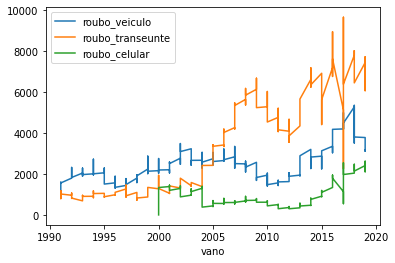

In [42]:
df.plot(x='vano',y=['roubo_veiculo','roubo_transeunte','roubo_celular']);

Vemos no gráfico acima que houve um aumento nos últimos anos de roubo de veículos, de transeuntes e de celulares. Podemos ver também que a partir do ano 2000 foi que começaram a existir o roubo de celulares.

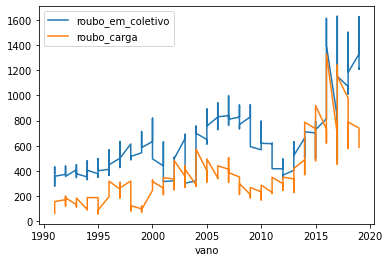

In [44]:
df.plot(x='vano',y=['roubo_em_coletivo','roubo_carga']);

No gráfico acima também podemos ver que houve um aumento nos últimos anos no roubo de cargas e de coletivos. 

Esse segundo gráfico foi postado a parte porque a faixa de valores das variáveis é um pouco a baixo da apresentada no gráfico anterior. Caso fosse plotado no mesmo gráfico, as duas variáveis iriam apresentar como se houvese uma certa regularidade nos valores, o que não é verdade, como vemos no gráfico acima.

#### Estagnação

Tipos de roubo com uma certa  estagnação nos últimos anos.

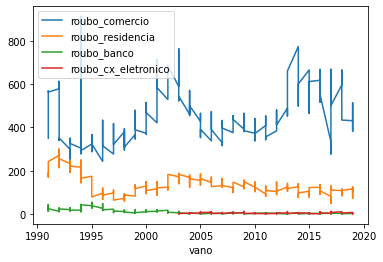

In [45]:
df.plot(x='vano',y=['roubo_comercio','roubo_residencia','roubo_banco','roubo_cx_eletronico']);

Já no gráfico acima podemos ver que nesses últimos anos há uma certa regularidade nas categorias roubo no comércio, roubo a bancos e roubo a caixas eletrônicos. Vemos que houve uma certa diminuição nos roubos a residências e podemos ver também que o início de roubos a caixas eletrônicos começou por volta de 2003.

## Conclusão

Nessa análise superficial, nós só olhamos algumas variáveis desse dataset, mas podemos ver que a violência cresce a cada ano no Rio de Janeiro. Mas, por incrível que pareça, mesmo com todos esses indicadores de violência, o Rio de Janeiro não é a capital mais violenta do país.

Segundo um estudo feito pelo Ipea (Instituto de Pesquisa Econômica Aplicada) em conjunto com o Fórum Brasileiro de Segurança Pública, divulgaram em agosto do ano passado o estudo Atlas da Violência 2019 – Retratos dos Municípios. O estudo mostra que 50% dos 65.602 homicídios ocorridos no Brasil no ano de 2017 aconteceram em apenas 2,1% dos municípios brasileiros.

Segundo os dados do Ipea e Fórum Brasileiro de Segurança Pública, a capital brasileira mais violenta é Fortaleza (CE), com 87,9 homicídios para cada 100 mil habitantes, em segundo lugar fica Rio Branco (AC), com 85,3 e em terceiro lugar Belém (PA) com 74,3. O Rio de Janeiro (RJ), com 35,6, fica em 18º.

O que complica para a cidade do Rio de Janeiro parecer como a cidade mais violenta, é ela ser o cartão postal do Brasil, uma das principais cidades de referência para os turistas quererem visitar o Brasil.